# 1. Defining the Question

## a) Specifying the Data Analytic Question

Is there a difference between the number of blue cars taken over weekdays different from those taken over weekends?

## b) Defining the Metric for Success

Predict if there is a difference between the number of blue cars taken over weekdays different from those taken over weekends

## c) Understanding the context

The research is to figure out the useage of blue cars using the provided dataset from Autolib car hiring company.

## d) Recording the Experimental Design

1) Reading the Data
2) Checking the Data
3) Tidying the Dataset

# Reading the Data

# New Section

In [2]:
#Importing all the necessary libraries to be used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/DSCoreAutolibDataset
#---
Autolib= pd.read_csv('/content/autolib_daily_events_postal_code.csv', parse_dates=True)

#Preview the top of the dataset
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#preview the bottom of our dataset
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
#Check the shape of the dataset
Autolib.shape

(16085, 13)

# Cleaning the Dataset

In [6]:
# Checking whether each column has an appropriate datatype
#---
Autolib.dtypes
#As the output shows, the column date is in object type
#instead of datetype and will be changed during cleaning of the dataset

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [7]:
# change date column from object to date
Autolib['date'] = pd.to_datetime(Autolib['date']) 

#Setting the date column as an index column
Autolib.set_index(['date'], inplace=True)

# Check that the datatype has changed
Autolib.dtypes 

Postal code                int64
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [8]:
#Standardize the format of the column names
Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [9]:
# Rename the dayOfWeek column name
Autolib.rename(columns={'dayofweek':'days_of_the_week'}, inplace=True) 
Autolib.head(3)

,postal_code,n_daily_data_points,days_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,2,weekday,138,139,0,0,2,2,27,27


In [10]:
# Convert the days of the week column into the name 
#of the days in place of the numbers

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

Autolib['days_of_the_week'] = Autolib['days_of_the_week'].apply(lambda x: days[x])

#Check if changes have applied
Autolib.head(3)

,postal_code,n_daily_data_points,days_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,Monday,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,Wednesday,weekday,138,139,0,0,2,2,27,27


In [11]:
# Identifying the Missing Data
#
Autolib.isnull().any()


postal_code               False
n_daily_data_points       False
days_of_the_week          False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

No missing values have been detected in the dataset

In [12]:
#drop unnecessary columns. 
Autolib.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis=1, inplace=True)
Autolib.head(3)

,postal_code,n_daily_data_points,days_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,
2018-01-01,75001,1440,Monday,weekday,110,103,22,20
2018-01-02,75001,1438,Tuesday,weekday,98,94,23,22
2018-01-03,75001,1439,Wednesday,weekday,138,139,27,27


In [13]:
# Identify and drop duplicates

Autolib = Autolib.drop_duplicates()

# check the shape of the data to see if there were any duplicates
Autolib.shape

(15872, 8)

Duplicates have been dropped considering the initial shape had 16085 rows and 13 columns

# Univariate Analysis

## Checking for outliers

In [14]:
# Checking for Outliers
#
#Calculating the first Quantile
Q1= Autolib.quantile(0.25)

#Calculating the Third Quantile
Q3= Autolib.quantile(0.75)

#Calculating the Quantile Range
IQR= Q3-Q1

# print((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR)))
#Displaying the number of existing outliers
print(IQR)

postal_code              2070.0
n_daily_data_points         1.0
bluecars_taken_sum        118.0
bluecars_returned_sum     117.0
slots_freed_sum             5.0
slots_taken_sum             5.0
dtype: float64


Our focus will be on the blue cars and the days of the week since that's the centre of our analysis.

Text(0, 0.5, 'Blue Cars Taken')

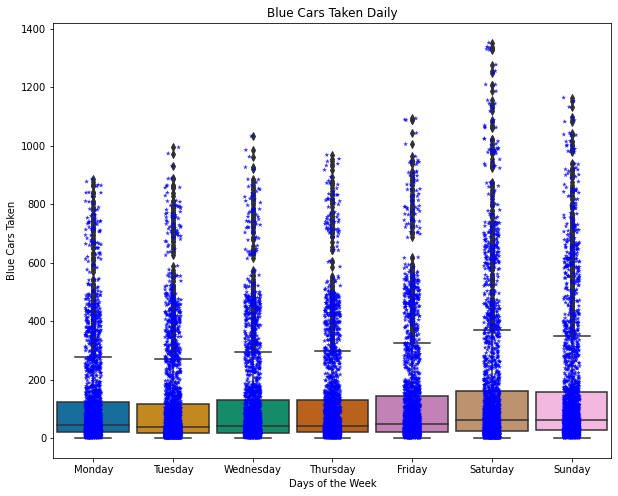

In [15]:
# check for outliers in the blue cars taken
#---
# First setting the dimensions of the plot
fig_dimensions = (10,8) 

# plot the boxplot
fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='bluecars_taken_sum', x='days_of_the_week', data=Autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='bluecars_taken_sum', x='days_of_the_week',  data=Autolib, jitter=True, marker='*', alpha=0.8, color='blue')

# Give the graph the header and axis names

bplot.axes.set_title("Blue Cars Taken Daily", fontsize=12)
bplot.set_xlabel("Days of the Week", fontsize=10)
bplot.set_ylabel("Blue Cars Taken", fontsize=10)

The outliers grow towards the end of the week meaning blue cars are used more on the weekends compared to weekdays, Saturday showing more activity.

Text(0, 0.5, 'Blue Cars Taken')

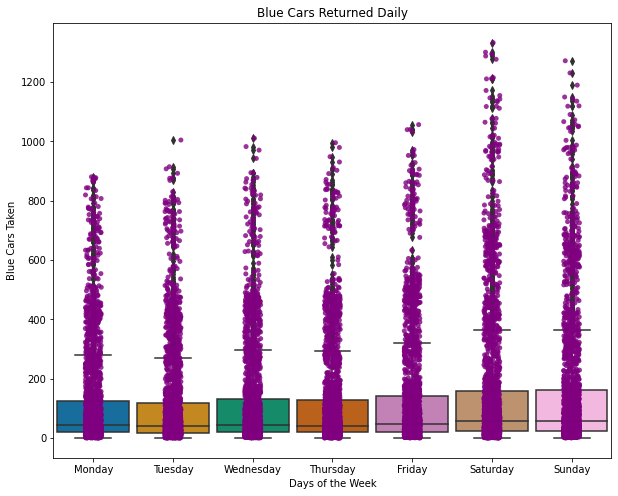

In [16]:
# check for outliers in the blue cars returned
#---
# First setting the dimensions of the plot
fig_dimensions = (10,8) 

# plot the boxplot
fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='bluecars_returned_sum', x='days_of_the_week', data=Autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='bluecars_returned_sum', x='days_of_the_week',  data=Autolib, jitter=True, marker='o', alpha=0.8, color='purple')

# Give the graph the header and axis names

bplot.axes.set_title("Blue Cars Returned Daily", fontsize=12)
bplot.set_xlabel("Days of the Week", fontsize=10)
bplot.set_ylabel("Blue Cars Taken", fontsize=10)

The same applies to the blue cars returned. Looks like there's more activity over the weekend than on weekdays.

Text(0, 0.5, 'Aggregate of Data Points')

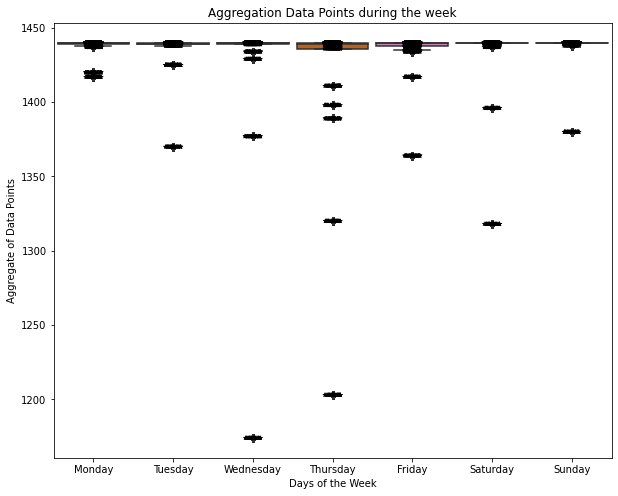

In [17]:
#Checking for outliers in the data points column and
#setting the dimensions of the plot
fig_dimensions = (10,8) 

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='n_daily_data_points', x='days_of_the_week', data=Autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#plotting the boxplot with data points using stripplot

bplot=sns.stripplot(y='n_daily_data_points', x='days_of_the_week',  data=Autolib, jitter=True, marker='*', alpha=0.8, color='black')

# Giving the graph the title and axis names

bplot.axes.set_title("Aggregation Data Points during the week", fontsize=12)
bplot.set_xlabel("Days of the Week", fontsize=10)
bplot.set_ylabel("Aggregate of Data Points", fontsize=10)

Text(0, 0.5, 'Recharging Slots Taken')

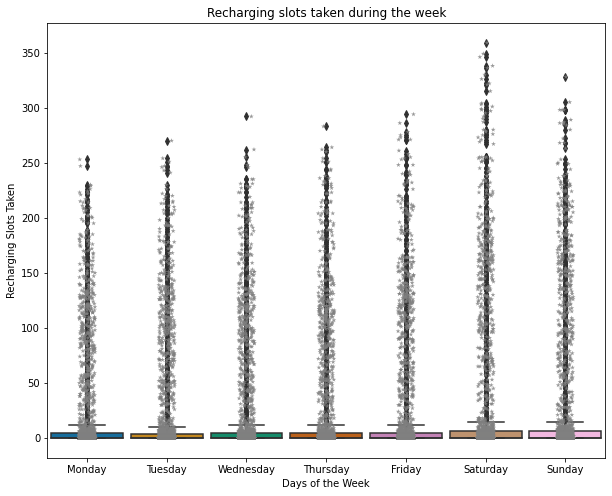

In [18]:
#checking for outliers in the recharging slots taken during the week

#Setting the dimensions of the plot

fig_dimensions = (10,8) 

# plotting the boxplot
fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='slots_taken_sum', x='days_of_the_week', data=Autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#plotting the boxplot with data points using stripplot

bplot=sns.stripplot(y='slots_taken_sum', x='days_of_the_week',  data=Autolib, jitter=True, marker='*', alpha=0.8, color='grey')

# Give the graph the header and axis names

bplot.axes.set_title("Recharging slots taken during the week", fontsize=12)
bplot.set_xlabel("Days of the Week", fontsize=10)
bplot.set_ylabel("Recharging Slots Taken", fontsize=10)

There seems to be a spike from Tuesday through Saturday and then a dip on Sunday and Monday.

Text(0, 0.5, 'Recharging Slots Freed')

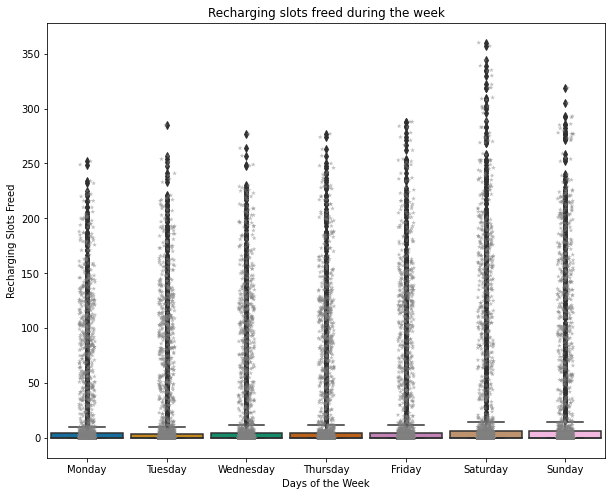

In [19]:
# check for outliers in the recharging slots freed during the week
#and setting the dimensions of the plot
fig_dimensions = (10,8) 

# plotting the boxplot
fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='slots_freed_sum', x='days_of_the_week', data=Autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='slots_freed_sum', x='days_of_the_week',  data=Autolib, jitter=True, marker='*', alpha=0.5, color='grey')

# Give the graph the header and axis names

bplot.axes.set_title("Recharging slots freed during the week", fontsize=12)
bplot.set_xlabel("Days of the Week", fontsize=10)
bplot.set_ylabel("Recharging Slots Freed", fontsize=10)

There seems to be a spike from Tuesday through Saturday and then a dip on Sunday and Monday.

## Measures of Central Tendency

In [20]:
# Check the mean of the dataset
print('The mean number of bluecars taken is: ', round(Autolib['bluecars_taken_sum'].mean(),0))
print('The mean number of bluecars returned is: ', round(Autolib['bluecars_returned_sum'].mean(),0))
print('The mean number of charging slots freed: ', round(Autolib['slots_freed_sum'].mean(),0))
print('The mean number of charging slots taken: ', round(Autolib['slots_taken_sum'].mean(),0))

The mean number of bluecars taken is:  127.0
The mean number of bluecars returned is:  127.0
The mean number of charging slots freed:  23.0
The mean number of charging slots taken:  23.0


The means have been rounded off because we cannot have floats while dealing with cars since that is unrealistic. The results show the mean of the blue cars are the same and the charging slots are the same.

In [21]:
# Check the median of the dataset
print('The median number of bluecars taken is: ', round(Autolib['bluecars_taken_sum'].median(),0))
print('The median number of bluecars returned is: ', round(Autolib['bluecars_returned_sum'].median(),0))
print('The median number of charging slots freed: ', round(Autolib['slots_freed_sum'].median(),0))
print('The median number of charging slots taken: ', round(Autolib['slots_taken_sum'].median(),0))


The median number of bluecars taken is:  47.0
The median number of bluecars returned is:  47.0
The median number of charging slots freed:  0.0
The median number of charging slots taken:  0.0


In [23]:
# Check the mode of the dataset
print('The mode of bluecars taken is: ', round(Autolib['bluecars_taken_sum'].mode(),0))
print('The mode of bluecars returned is: ', round(Autolib['bluecars_returned_sum'].mode(),0))
print('The mode of charging slots freed: ', round(Autolib['slots_freed_sum'].mode(),0))
print('The mode of charging slots taken: ', round(Autolib['slots_taken_sum'].mode(),0))


The mode of bluecars taken is:  0    12
dtype: int64
The mode of bluecars returned is:  0    13
dtype: int64
The mode of charging slots freed:  0    0
dtype: int64
The mode of charging slots taken:  0    0
dtype: int64


## Measures of dispersion

In [24]:
# Check the standard deviation of the dataset

print('The standard deviation of bluecars taken is: ', Autolib['bluecars_taken_sum'].std())
print('The standard deviation of bluecars returned is: ', Autolib['bluecars_returned_sum'].std())
print('The standard deviation of charging slots freed: ', Autolib['slots_freed_sum'].std())
print('The standard deviation of charging slots taken: ', Autolib['slots_taken_sum'].std())

The standard deviation of bluecars taken is:  186.2260807978868
The standard deviation of bluecars returned is:  186.30337443749949
The standard deviation of charging slots freed:  52.4027532523581
The standard deviation of charging slots taken:  52.428723352900015


In [25]:
print('The skew of bluecars taken is: ', Autolib['bluecars_taken_sum'].skew())
print('The skew of bluecars returned is: ', Autolib['bluecars_returned_sum'].skew())
print('The skew of charging slots freed: ', Autolib['slots_freed_sum'].skew())
print('The skew of charging slots taken: ', Autolib['slots_taken_sum'].skew())

The skew of bluecars taken is:  2.386882654790059
The skew of bluecars returned is:  2.392589722043098
The skew of charging slots freed:  2.5736574748960406
The skew of charging slots taken:  2.5731548507318855


The dataset has positive skews meaning that the tail on the right side of the curve is bigger than the left side. This concludes that the data points lean more towards the lower numbers of the range in each label.

In [26]:
# Check the kurtosis of the dataset

print('The kurtosis of bluecars taken is: ', Autolib['bluecars_taken_sum'].kurt())
print('The kurtosis of bluecars returned is: ', Autolib['bluecars_returned_sum'].kurt())
print('The kurtosis of charging slots released: ', Autolib['slots_freed_sum'].kurt())
print('The kurtosis of charging slots taken: ', Autolib['slots_taken_sum'].kurt())


The kurtosis of bluecars taken is:  6.060739290599625
The kurtosis of bluecars returned is:  6.073955633185672
The kurtosis of charging slots released:  6.316308579110861
The kurtosis of charging slots taken:  6.304441830333567


Looking at the kurtosis, we can conclude that there is a high presence of outliers in the data.

# Bivariate Analysis

In [30]:
Autolib.head(3)

,postal_code,n_daily_data_points,days_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,
2018-01-01,75001,1440,Monday,weekday,110,103,22,20
2018-01-02,75001,1438,Tuesday,weekday,98,94,23,22
2018-01-03,75001,1439,Wednesday,weekday,138,139,27,27


In [31]:
# drop categorical data from our dataframe so as to enable bivariate analysis

Autolib_non_categorical = Autolib.drop(['day_type','days_of_the_week'], axis=1)
Autolib_non_categorical

,postal_code,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,
2018-01-01,75001,1440,110,103,22,20
2018-01-02,75001,1438,98,94,23,22
2018-01-03,75001,1439,138,139,27,27
2018-01-04,75001,1320,104,104,25,21
2018-01-05,75001,1440,114,117,18,20
...,...,...,...,...,...,...
2018-06-15,95880,1440,15,10,0,0
2018-06-16,95880,1440,19,19,0,0
2018-06-17,95880,1440,33,35,0,0


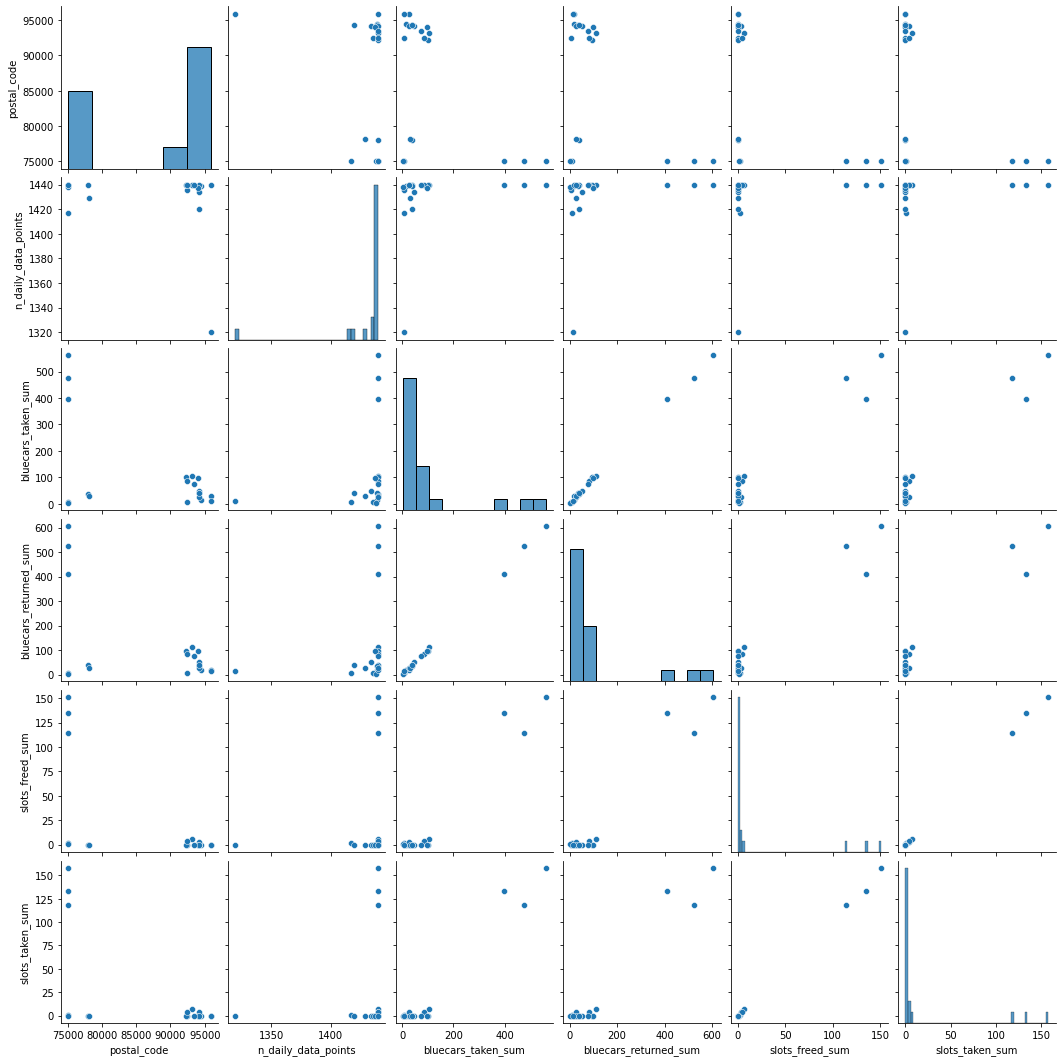

In [56]:
sns.pairplot(Autolib_non_categorical.sample(20))
plt.show()

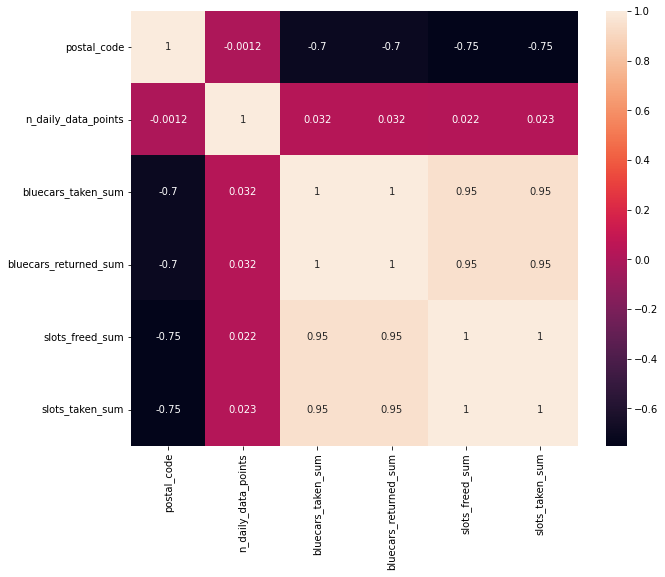

In [33]:
fig_dimensions = (10,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

sns.heatmap(Autolib_non_categorical.corr(),annot=True)
plt.show()

A correlation of 1 means that categories are more correlated. As seen in the pairplot and correlation matrix, bluecars returned and bluecars have a positive correlation. This only goes to show that there is a high solicitation for blue cars.


Slots taken and slots freed also have a positive correlation. It could be argued that when slots are taken, the blue cars returned are charging their batteries at this point and once fully charged, the slots are free and the bluecars are taken for hire. This cycle clearly explains the positive correlation.

Postal code has a strong negative correlation with all the other data labels.

# Stratified Sampling

## Hypothesis

**Null Hypothesis**: The mean number of bluecars taken over the weekend is the same as the mean number of bluecars taken on weekdays

**Alternative Hypothesis**: The mean number of bluecars taken over the weekend is greater than the mean number of bluecars taken on weekdays

## Reading the Dataset

In [60]:
#Previewing the dataset
Autolib.head(5)

,postal_code,n_daily_data_points,days_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,
2018-01-01,75001,1440,Monday,weekday,110,103,22,20
2018-01-02,75001,1438,Tuesday,weekday,98,94,23,22
2018-01-03,75001,1439,Wednesday,weekday,138,139,27,27
2018-01-04,75001,1320,Thursday,weekday,104,104,25,21
2018-01-05,75001,1440,Friday,weekday,114,117,18,20


In [61]:
#The focus of our hypothesis is to check whether the number of bluecars taken over the weekend is
# different from the bluecars taken over the weekday, we will drop the unnecessary columns

bluecars =Autolib.drop(['postal_code','n_daily_data_points','bluecars_returned_sum','slots_freed_sum','slots_taken_sum'], axis=1)

#preview our new dataset
bluecars.head(3)

,days_of_the_week,day_type,bluecars_taken_sum
date,,,
2018-01-01,Monday,weekday,110
2018-01-02,Tuesday,weekday,98
2018-01-03,Wednesday,weekday,138


In [62]:
# confirm the proprtion of bluecars hired in each day of the week

((bluecars['days_of_the_week'].value_counts())/len(bluecars))*100


Tuesday      14.749244
Monday       14.642137
Friday       14.207409
Thursday     14.169607
Sunday       14.106603
Wednesday    14.094002
Saturday     14.030998
Name: days_of_the_week, dtype: float64

In [63]:
# create a stratified random sample from the bluecars dataframe

# To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our 
# dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 100. 
# The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
bluecars_stratified = bluecars.groupby(['days_of_the_week'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print((bluecars_stratified['days_of_the_week'].value_counts()/len(bluecars_stratified))*100)

# Check the stratified output
print(bluecars_stratified)

Tuesday      14.735516
Monday       14.609572
Friday       14.231738
Thursday     14.168766
Sunday       14.105793
Wednesday    14.105793
Saturday     14.042821
Name: days_of_the_week, dtype: float64
           days_of_the_week day_type  bluecars_taken_sum
date                                                    
2018-03-09           Friday  weekday                   7
2018-04-27           Friday  weekday                   9
2018-03-23           Friday  weekday                  49
2018-04-20           Friday  weekday                  18
2018-02-09           Friday  weekday                  26
...                     ...      ...                 ...
2018-04-04        Wednesday  weekday                  41
2018-02-07        Wednesday  weekday                 228
2018-01-17        Wednesday  weekday                  39
2018-06-13        Wednesday  weekday                  19
2018-06-13        Wednesday  weekday                  81

[1588 rows x 3 columns]


# Statistical Distribution

## The t-distribution

Since we are interested in comparing the means of two samples, we use the t-test to tell if the two means are statistically different from each other

The test will use a p-value of 0.05 (or 5%)

The t- statistic is calculated as: The difference between sample means / standard error of the difference between the means



In [64]:
# import the necessary libraries to enable us compute the t-statistic
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import t

In [65]:
#previewing the dataset
bluecars_stratified.head(3)

,days_of_the_week,day_type,bluecars_taken_sum
date,,,
2018-03-09,Friday,weekday,7
2018-04-27,Friday,weekday,9
2018-03-23,Friday,weekday,49


In [66]:
#checking the datatypes
bluecars_stratified.dtypes 

days_of_the_week      object
day_type              object
bluecars_taken_sum     int64
dtype: object

In [67]:
#separate the bluecars_stratified dataframe into two dataframes for
#the calculation of standard deviations and means

# create a bluecars_weekday dataframe
bluecars_weekday = bluecars_stratified[bluecars_stratified.day_type == 'weekday']
bluecars_weekday.shape

(1141, 3)

In [68]:
#creating a bluecars_weekend dataframe
bluecars_weekend = bluecars_stratified[bluecars_stratified.day_type == 'weekend']
bluecars_weekend.shape

(447, 3)

In [69]:
# calculate the means
#---
weekday_mean = bluecars_weekday['bluecars_taken_sum'].mean()
print('The mean of the weekday bluecars hired out is: ', weekday_mean)


weekend_mean = bluecars_weekend['bluecars_taken_sum'].mean()
print('The mean of the weekend bluecars hired out is: ', weekend_mean)

The mean of the weekday bluecars hired out is:  118.53023663453111
The mean of the weekend bluecars hired out is:  148.40044742729307


In [72]:
# calculate the standard deviation:
#---
weekday_std = bluecars_weekday['bluecars_taken_sum'].std()
print('The standard deviation of the weekday bluecars hired out is: ', weekday_std)


weekend_std = bluecars_weekend['bluecars_taken_sum'].std()
print('The standard deviation of the weekend bluecars hired out is: ', weekend_std)

The standard deviation of the weekday bluecars hired out is:  180.97138527043003
The standard deviation of the weekend bluecars hired out is:  218.12570592950144


In [73]:
# calculate the standard error  
#---
weekday_std_error = weekday_std/ len(bluecars_weekday)
print('The standard error of the weekday bluecars hired out is: ', weekday_std_error)


weekend_std_error = weekend_std/ len(bluecars_weekend)
print('The standard error of the weekend bluecars hired out is: ', weekend_std_error)

The standard error of the weekday bluecars hired out is:  0.15860769962351448
The standard error of the weekend bluecars hired out is:  0.487976970759511


In [74]:
# Calculate the standard error of the difference between the means:
standard_error_diff = sqrt((weekday_std_error**2) + (weekend_std_error**2))

standard_error_diff

0.5131061550707531

In [75]:
# calculate the t statistic

t_statistic = (weekday_mean - weekend_mean)/standard_error_diff

t_statistic

-58.21448543848224

In [76]:
# calculate the degrees of freedom

df = len(bluecars_weekday) + len(bluecars_weekend) - 2

df

1586

In [77]:
# calculate the critical value

alpha = 0.05 # This had been mentioned earlier

critical_value = t.ppf(1.0 - alpha, df)

critical_value

1.6458149541902078

In [78]:
# calculate the p-value
p = (1.0 - t.cdf(abs(t_statistic), df)) * 2.0

p

0.0

In [79]:
#Interpreting our analysis using the critical value

if abs(t_statistic) <= critical_value:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [80]:
#Interpreting our analysis using the p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


**Conclusion:**
We reject the null hypothesis and accept the alternative hypothesis that the means are not equal. This explains that the mean number of bluecars taken over the weekend is greater than the mean number of bluecars taken on weekdays.